In [195]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [249]:
timed_df = pd.read_csv("Fetched_nifty500_fm2019_withDATE.csv")
timed_df.fillna(0, inplace=True)


timed_df['Date'] = pd.to_datetime(timed_df['Date'])
timed_df.set_index('Date', inplace=True)
# timed_df = timed_df.drop(columns='Date')


# Drop columns where every entry is 0.0
timed_df = timed_df.loc[:, (timed_df != 0).any(axis=0)]


# # # Use the column selection to drop columns where less than the threshold number of values are non-zero
threshold = 0.70 * len(timed_df)
timed_df = timed_df.loc[:, (timed_df != 0).sum() >= threshold]

In [250]:
# Assuming timed_df is your DataFrame indexed by date

# Set the desired start and end dates
start_date = '2019-09-19'
end_date = '2024-08-02'

# Use loc to select rows within the specified date range
timed_df = timed_df.loc[start_date:end_date]

# Set the desired number of columns to keep
num_columns_to_keep = 100 #Replace with your desired number

# first num columns
# timed_df = timed_df.iloc[:, :num_columns_to_keep]

# last num columns 
# timed_df = timed_df.iloc[:, -num_columns_to_keep:]

timed_df = timed_df.replace(0, np.nan).fillna(method='ffill')
timed_df = timed_df.replace(0, np.nan).fillna(method='bfill')
#random num columns


# timed_df = timed_df.sample(n=num_columns_to_keep, axis=1)



timed_df.isna().sum().sum()

0

In [251]:
timed_df

,360ONE,3MINDIA,ABB,ACC,AIAENG,APLAPOLLO,AUBANK,AARTIDRUGS,AARTIIND,AAVAS,...,WESTLIFE,WHIRLPOOL,WIPRO,YESBANK,ZFCVINDIA,ZEEL,ZENSARTECH,ZYDUSLIFE,ZYDUSWELL,ECLERX
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-19,317.625000,18526.50000,1325.449951,1479.000000,1602.849976,127.620003,322.399994,111.312500,385.987488,1465.099976,...,273.149994,1674.750000,241.500000,54.099998,6060.049805,308.850006,214.850006,238.050003,1663.849976,334.799988
2019-09-20,333.500000,20224.44922,1409.099976,1633.849976,1649.550049,130.934998,322.250000,116.375000,405.950012,1498.750000,...,310.049988,1807.900024,245.949997,55.500000,6107.250000,301.399994,215.250000,247.449997,1646.699951,321.733337
2019-09-23,350.174988,20379.15039,1553.250000,1675.750000,1745.699951,140.604996,341.250000,119.737503,418.537506,1601.349976,...,320.799988,1853.500000,239.350006,55.450001,6338.850098,271.600006,210.750000,247.600006,1708.099976,312.433319
2019-09-24,367.674988,19722.30078,1573.349976,1650.800049,1759.650024,141.744995,334.975006,120.724998,409.450012,1585.250000,...,320.750000,1885.400024,240.699997,56.049999,6184.850098,279.000000,210.000000,253.949997,1746.550049,303.399994
2019-09-25,351.237488,20058.94922,1539.599976,1633.650024,1737.500000,139.139999,322.024994,116.487503,404.937500,1586.500000,...,317.149994,1838.900024,238.800003,53.700001,6290.600098,273.450012,210.100006,249.100006,1749.400024,296.066681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-02,604.950012,32868.80078,4480.450195,2499.449951,4461.200195,1478.650024,629.000000,509.350006,644.700012,1484.050049,...,846.650024,1346.800049,483.149994,23.700001,14902.950200,172.899994,560.950012,761.150024,1598.650024,2687.050049
2024-02-05,615.500000,32380.94922,4368.200195,2486.199951,4323.200195,1435.599976,622.599976,520.549988,643.799988,1438.500000,...,837.549988,1354.500000,482.350006,22.799999,14434.950200,178.000000,564.400024,760.900024,1589.699951,2624.550049
2024-02-06,628.500000,33123.25000,4403.000000,2528.250000,4423.049805,1402.849976,616.500000,538.650024,660.049988,1447.000000,...,830.000000,1367.099976,499.649994,25.400000,14202.849610,175.800003,592.150024,797.400024,1600.349976,2667.949951


In [252]:
# Show daily returns
returns = timed_df.pct_change()
returns.fillna(0, inplace=True)
returns.replace([np.inf, -np.inf], 0, inplace=True)

returns

,360ONE,3MINDIA,ABB,ACC,AIAENG,APLAPOLLO,AUBANK,AARTIDRUGS,AARTIIND,AAVAS,...,WESTLIFE,WHIRLPOOL,WIPRO,YESBANK,ZFCVINDIA,ZEEL,ZENSARTECH,ZYDUSLIFE,ZYDUSWELL,ECLERX
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-09-20,0.049980,0.091650,0.063111,0.104699,0.029136,0.025976,-0.000465,0.045480,0.051718,0.022968,...,0.135091,0.079504,0.018426,0.025878,0.007789,-0.024122,0.001862,0.039487,-0.010307,-0.039028
2019-09-23,0.050000,0.007649,0.102299,0.025645,0.058289,0.073853,0.058960,0.028894,0.031007,0.068457,...,0.034672,0.025223,-0.026835,-0.000901,0.037922,-0.098872,-0.020906,0.000606,0.037287,-0.028906
2019-09-24,0.049975,-0.032231,0.012941,-0.014889,0.007991,0.008108,-0.018388,0.008247,-0.021712,-0.010054,...,-0.000156,0.017211,0.005640,0.010821,-0.024295,0.027246,-0.003559,0.025646,0.022510,-0.028913
2019-09-25,-0.044707,0.017069,-0.021451,-0.010389,-0.012588,-0.018378,-0.038660,-0.035100,-0.011021,0.000789,...,-0.011224,-0.024663,-0.007894,-0.041927,0.017098,-0.019892,0.000476,-0.019098,0.001632,-0.024170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-02,-0.020324,-0.027661,-0.014430,-0.012075,0.024057,-0.009147,-0.009371,-0.033583,0.002020,-0.013822,...,0.020552,0.001413,0.025034,-0.008368,-0.033735,0.013779,-0.009972,0.002107,-0.000438,-0.027224
2024-02-05,0.017439,-0.014842,-0.025053,-0.005301,-0.030933,-0.029114,-0.010175,0.021989,-0.001396,-0.030693,...,-0.010748,0.005717,-0.001656,-0.037975,-0.031403,0.029497,0.006150,-0.000328,-0.005599,-0.023260
2024-02-06,0.021121,0.022924,0.007967,0.016913,0.023096,-0.022813,-0.009798,0.034771,0.025241,0.005909,...,-0.009014,0.009302,0.035866,0.114035,-0.016079,-0.012360,0.049167,0.047970,0.006699,0.016536


In [253]:
# Annualized covariance matrix

# cov_matrix_annual = returns.cov()*252
cov_matrix_annual = returns.cov()*246
cov_matrix_annual.fillna(0, inplace=True)
cov_matrix_annual

,360ONE,3MINDIA,ABB,ACC,AIAENG,APLAPOLLO,AUBANK,AARTIDRUGS,AARTIIND,AAVAS,...,WESTLIFE,WHIRLPOOL,WIPRO,YESBANK,ZFCVINDIA,ZEEL,ZENSARTECH,ZYDUSLIFE,ZYDUSWELL,ECLERX
360ONE,0.153610,0.022400,0.016014,0.021121,0.014626,0.036484,0.026501,0.018934,0.023421,0.028297,...,0.032634,0.022535,0.020396,0.016972,0.008029,0.030793,0.026814,0.018479,0.013170,0.023762
3MINDIA,0.022400,0.096794,0.019315,0.026412,0.016909,0.029887,0.028333,0.029691,0.026893,0.020913,...,0.023188,0.022588,0.023279,0.009091,0.015438,0.037105,0.031411,0.016625,0.009681,0.024791
ABB,0.016014,0.019315,0.107610,0.030163,0.018430,0.033036,0.031263,0.014347,0.026554,0.023244,...,0.026579,0.019217,0.017389,0.013900,0.018664,0.026055,0.026465,0.014766,0.008817,0.016458
ACC,0.021121,0.026412,0.030163,0.095714,0.019736,0.033242,0.036196,0.025417,0.032525,0.025360,...,0.025588,0.025869,0.025156,0.023339,0.011631,0.046741,0.035518,0.022721,0.008746,0.022865
AIAENG,0.014626,0.016909,0.018430,0.019736,0.103353,0.029213,0.022775,0.016953,0.020377,0.015039,...,0.018067,0.017872,0.011393,-0.004298,0.004968,0.023687,0.018598,0.010312,0.007436,0.020710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEEL,0.030793,0.037105,0.026055,0.046741,0.023687,0.045949,0.028826,0.039761,0.043995,0.006669,...,0.025245,0.038343,0.037665,0.048297,0.008535,0.357526,0.049009,0.034008,0.019828,0.044170
ZENSARTECH,0.026814,0.031411,0.026465,0.035518,0.018598,0.040269,0.029952,0.027760,0.040714,0.035027,...,0.028602,0.024646,0.041149,0.030298,0.019749,0.049009,0.209792,0.019484,0.018044,0.038128
ZYDUSLIFE,0.018479,0.016625,0.014766,0.022721,0.010312,0.023287,0.022364,0.036225,0.029652,0.012873,...,0.016109,0.017319,0.027163,0.026708,0.005767,0.034008,0.019484,0.089968,0.021316,0.022253
ZYDUSWELL,0.013170,0.009681,0.008817,0.008746,0.007436,0.020550,0.015886,0.019329,0.017388,0.014346,...,0.005989,0.011939,0.011354,0.011792,0.002445,0.019828,0.018044,0.021316,0.066629,0.010862


In [254]:
weights = np.full(timed_df.shape[1], 1 / timed_df.shape[1])
weights

array([0.00228311, 0.00228311, 0.00228311, 0.00228311, 0.00228311,
       0.00228311, 0.00228311, 0.00228311, 0.00228311, 0.00228311,
       0.00228311, 0.00228311, 0.00228311, 0.00228311, 0.00228311,
       0.00228311, 0.00228311, 0.00228311, 0.00228311, 0.00228311,
       0.00228311, 0.00228311, 0.00228311, 0.00228311, 0.00228311,
       0.00228311, 0.00228311, 0.00228311, 0.00228311, 0.00228311,
       0.00228311, 0.00228311, 0.00228311, 0.00228311, 0.00228311,
       0.00228311, 0.00228311, 0.00228311, 0.00228311, 0.00228311,
       0.00228311, 0.00228311, 0.00228311, 0.00228311, 0.00228311,
       0.00228311, 0.00228311, 0.00228311, 0.00228311, 0.00228311,
       0.00228311, 0.00228311, 0.00228311, 0.00228311, 0.00228311,
       0.00228311, 0.00228311, 0.00228311, 0.00228311, 0.00228311,
       0.00228311, 0.00228311, 0.00228311, 0.00228311, 0.00228311,
       0.00228311, 0.00228311, 0.00228311, 0.00228311, 0.00228311,
       0.00228311, 0.00228311, 0.00228311, 0.00228311, 0.00228

In [255]:
# Calculate PORTFOLIO variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.034911193113040764

In [256]:
# Calculate PORTFOLIO volatility (std. dev)
port_volatility = np.sqrt(port_variance)
port_volatility

0.1868453722012958

In [257]:
# Annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.3473663574824593

In [258]:
# DISPLAY

percent_var = str(round(port_variance, 2)*100) + "%"
percent_vol = str(round(port_volatility, 2)*100) + "%"
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100) + "%"

print ("Expected Annual Return: " + percent_ret)
print ("Annual Volatility: " + percent_vol)
print ("Annual Variance: " + percent_var)

Expected Annual Return: 35.0%
Annual Volatility: 19.0%
Annual Variance: 3.0%


# OPTIMIZATION

In [259]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [260]:
mu = expected_returns.mean_historical_return(timed_df, frequency=252)

# mu = expected_returns.ema_historical_return(timed_df)

# mu = expected_returns.return_model(timed_df)


# mu = expected_returns.capm_return(timed_df)


mu.fillna(0, inplace = True)
mu.replace(np.inf, 0.0, inplace=True)

In [261]:
# S = risk_models.sample_cov(timed_df)

S = risk_models.exp_cov(timed_df)

# S = risk_models.CovarianceShrinkage(timed_df)

# S = (S + S.T) / 2

S.fillna(0, inplace = True)
S.replace(np.inf, 0.0, inplace=True)

In [262]:
# S_normalized
# S_f = (S + S.T) / 2

#S_reg
S_f = S + 1e-6 * np.eye(S.shape[0])


In [263]:
# ef = EfficientFrontier(mu, S)
ef = EfficientFrontier(mu, S_f, solver="ECOS")
# solvers: ECOS, OSQP

# weights = ef.max_sharpe()


# Maximize Return for a Target Volatility:
weights = ef.efficient_return(target_return=0.20)

# Minimize Volatility for a Target Return:
# weights = ef.efficient_risk(target_volatility=0.30)

refined_weights = ef.clean_weights()


In [264]:
print ()
print ()
print ("-----PORTFOLIO PERFORMANCE-----")
print ()


ef.portfolio_performance(verbose = True)


print ()
print ()
print ("-----ASSET ALLOCATION-----")
print ()


refined_weights = {key: value for key, value in refined_weights.items() if value != 0.0}

# Normalize the percentages
total_weight = sum(refined_weights.values())
refined_weights_percent = {key: (value / total_weight) * 100 for key, value in refined_weights.items()}
assest = []
weight = {}
for key, value in refined_weights_percent.items():
    assest.append(key)
    weight[key] = value
    print(f"{key}: {value:.2f}%")




-----PORTFOLIO PERFORMANCE-----

Expected annual return: 20.0%
Annual volatility: 5.6%
Sharpe Ratio: 3.22


-----ASSET ALLOCATION-----

360ONE: 1.65%
AAVAS: 2.20%
AUROPHARMA: 0.09%
DMART: 1.07%
BAJAJ-AUTO: 0.20%
BLUEDART: 2.83%
BRITANNIA: 1.38%
CGPOWER: 0.39%
CRISIL: 0.84%
CGCL: 2.78%
CERA: 4.05%
CIPLA: 1.33%
CREDITACC: 0.93%
DRREDDY: 1.01%
ELGIEQUIP: 0.79%
GILLETTE: 2.12%
HONAUT: 5.71%
ICICIBANK: 9.52%
ICICIGI: 0.81%
JYOTHYLAB: 0.35%
KSB: 0.39%
KEC: 1.33%
MARICO: 1.10%
NESTLEIND: 0.21%
OIL: 0.88%
PFIZER: 9.69%
POWERGRID: 0.25%
PGHL: 4.20%
PGHH: 2.03%
RELAXO: 5.15%
SAFARI: 0.51%
SANOFI: 3.65%
SOLARINDS: 0.84%
SUNPHARMA: 1.22%
SUNDARMFIN: 1.14%
SUNDRMFAST: 1.80%
SUPREMEIND: 1.02%
SUVENPHAR: 4.05%
SYMPHONY: 4.26%
TCS: 0.70%
TATAELXSI: 1.20%
TIMKEN: 0.08%
TORNTPHARM: 4.60%
VMART: 2.02%
VBL: 0.79%
VINATIORGA: 1.14%
WESTLIFE: 2.00%
WHIRLPOOL: 2.58%
ZFCVINDIA: 1.13%


In [265]:
import math


# invest_amount = 1_00_000
# not_invested = []
# invested = {}

# for i in refined_weights_percent:
#     price = timed_df[i][start_date]
#     stock_invest = refined_weights_percent[i] * invest_amount / 100
#     if stock_invest < price or refined_weights_percent[i] < 1:
#         not_invested.append(i)
#         continue
#     units = math.floor(stock_invest / price)
#     invested[i] = {
#         "price": price,
#         "units": units,
#         "allocated": price*units
#     }

# sum_investable = sum([invested[i]["allocated"] for i in invested])
# remaining = invest_amount - sum_investable

# for i in not_invested:
#     price = timed_df[i][start_date]
#     if price < remaining:
#         invested[i] = {
#             "price": price,
#             "units": math.floor(remaining / price),
#             "allocated": price * math.floor(remaining / price)
#         }
#         not_invested.remove(i)
#         remaining = remaining - invested[i]["price"] * invested[i]["units"]


In [266]:
def discrete_allocation(invest_amount, refined_weights_percent, timed_df, start_date):
    not_invested = []
    invested = {}

    for i in refined_weights_percent:
        price = timed_df[i][start_date]
        stock_invest = refined_weights_percent[i] * invest_amount / 100
        if stock_invest < price or refined_weights_percent[i] < 1:
            not_invested.append(i)
            continue
        units = math.floor(stock_invest / price)
        invested[i] = {
            "price": price,
            "units": units,
            "allocated": price*units
        }

    sum_investable = sum([invested[i]["allocated"] for i in invested])
    remaining = invest_amount - sum_investable

    for i in not_invested:
        price = timed_df[i][start_date]
        if price < remaining:
            invested[i] = {
                "price": price,
                "units": math.floor(remaining / price),
                "allocated": price * math.floor(remaining / price)
            }
            not_invested.remove(i)
            remaining = remaining - invested[i]["price"] * invested[i]["units"]


    return invested, not_invested, remaining

In [267]:
invest_amount = 1_00_000

In [268]:
invested, not_invested, remaining = discrete_allocation(invest_amount=invest_amount, refined_weights_percent=refined_weights_percent, timed_df=timed_df, start_date=start_date)

In [269]:
invested, remaining

({'360ONE': {'price': 317.625, 'units': 5, 'allocated': 1588.125},
  'AAVAS': {'price': 1465.099976, 'units': 1, 'allocated': 1465.099976},
  'BLUEDART': {'price': 2200.300049, 'units': 1, 'allocated': 2200.300049},
  'CGCL': {'price': 180.3500061, 'units': 15, 'allocated': 2705.2500915},
  'CERA': {'price': 2542.199951, 'units': 1, 'allocated': 2542.199951},
  'CIPLA': {'price': 452.0499878, 'units': 2, 'allocated': 904.0999756},
  'ICICIBANK': {'price': 386.6000061, 'units': 24, 'allocated': 9278.4001464},
  'KEC': {'price': 250.4499969, 'units': 5, 'allocated': 1252.2499845},
  'MARICO': {'price': 380.0, 'units': 2, 'allocated': 760.0},
  'PFIZER': {'price': 3244.5, 'units': 2, 'allocated': 6489.0},
  'RELAXO': {'price': 467.1000061, 'units': 11, 'allocated': 5138.1000671},
  'SUNPHARMA': {'price': 411.1499939, 'units': 2, 'allocated': 822.2999878},
  'SUNDRMFAST': {'price': 424.2000122, 'units': 4, 'allocated': 1696.8000488},
  'SUVENPHAR': {'price': 168.5249939,
   'units': 24,
  

In [270]:
newTimeDf = timed_df[[i for i in invested.keys()]]

In [271]:
# import math


# def DiscreteAllocation(timed_df, weight, investAmount, startDate):
#     reminder = 0
#     newWeights = {}
#     for key, value in weight.items():
#         allocatedPrice = value*investAmount*0.01
#         # Use Start date in iloc
#         units = math.floor(allocatedPrice / timed_df[key][startDate])
#         print(units)
#         rem: pd.Series = allocatedPrice - units * timed_df[key][startDate]
#         print(rem)
#         newWeights[key] = {"price": timed_df[key][startDate], "units": units, "allocated": (
#             value*investAmount*0.01), "reminder": rem}
#         reminder += rem

#     return reminder, newWeights

# r, weights = DiscreteAllocation(newTimeDf, weight,100000, start_date)

In [272]:
from collections import defaultdict


def BackTest(df, startDate, duration, weights):
    """
    duration: in days
    startDate: starting date string
    weights: weights dict 
    """
    window = 2 #month
    start = datetime.datetime.strptime(startDate, "%Y-%m-%d")
    end = start + datetime.timedelta(days=30*window)

    end_stop_date = start + datetime.timedelta(days=duration)
    x = defaultdict(dict)
    c = 1
    while end < end_stop_date:
        end = start + datetime.timedelta(days=30*window)
        temp = df.loc[start:end, :]

        # print(temp.iloc[-1,0])
        for i in weights.keys():
            x[i][c] = {
                "date_start": str(temp[i].iloc[0:].index[0])[:10],
                "date_end": str(temp[i].iloc[-1:].index[0])[:10],
                "date_start_price": temp[i].iloc[0],
                "date_end_price": temp[i].iloc[-1]
            }
        for key, values in x.items():
            st = values[c]["date_start_price"]
            en = values[c]["date_end_price"]

            st_price = st * weights[key]["units"]
            en_price = en * weights[key]["units"]
            pct_cng = (en_price - st_price)/st_price * 100
            values[c]["st_alloc"] = st_price
            values[c]["en_alloc"] = en_price

            values[c]["pct_change"] = pct_cng
        
        start = end
        c += 1

    return x, c-1

In [273]:
backtest_duration = 600

In [274]:
window, total_windows = BackTest(newTimeDf,"2019-09-20", backtest_duration, invested)
print(total_windows)

10


In [275]:
def PercentChange(window, totalWindows):
    pctChange = []
    endDate = []
    for part in range(1, totalWindows+1):
        startPrice = endPrice = 0
        end = None
        for key, value in window.items():
            cycle = window[key].get(part)
            startPrice += cycle['st_alloc']
            endPrice += cycle['en_alloc']
            # print(part , cycle['date_end'])
            end = cycle['date_end']
        endDate.append(end)
        pctChange.append(((endPrice - startPrice)/startPrice * 100))
    return pctChange, endDate

In [276]:
portfolioPercentChange, endDates = PercentChange(window, total_windows)


In [277]:
portfolio = pd.DataFrame({
    'Date': endDates,
    'PctChange': portfolioPercentChange
})


In [278]:
print(portfolio)

         Date  PctChange
0  2019-11-19  -8.932211
1  2020-01-17   9.699034
2  2020-03-18 -20.743098
3  2020-05-15  27.388618
4  2020-07-16  18.801327
5  2020-09-14   5.748997
6  2020-11-13   7.474165
7  2021-01-12  14.564393
8  2021-03-12  -1.144709
9  2021-05-12  11.473861


<Axes: xlabel='Date', ylabel='PctChange'>

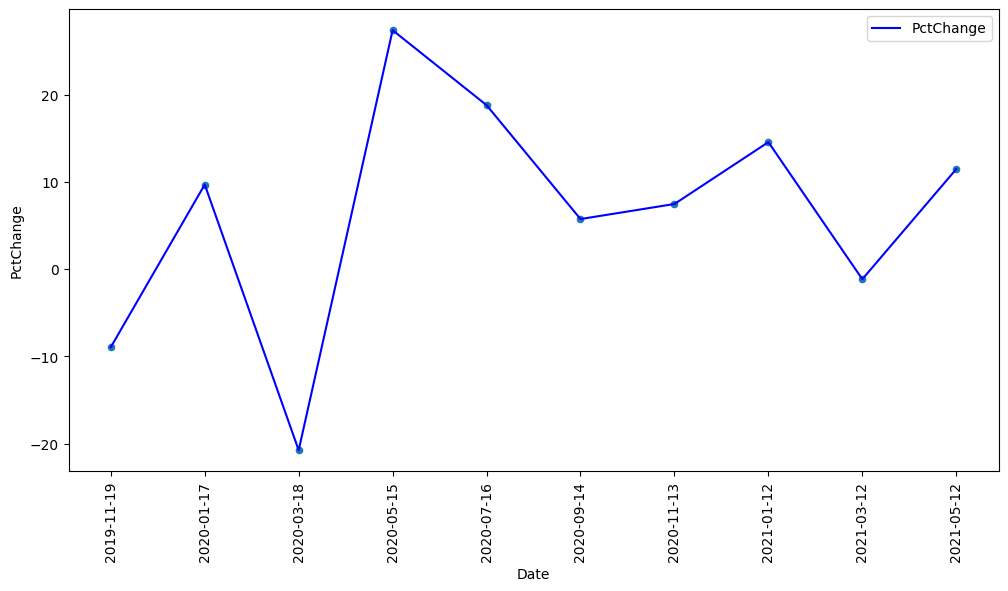

In [279]:
# plt.plot(data=portfolio)
ax = portfolio.plot(x="Date", y="PctChange", kind="scatter", figsize=[12,6], style='b', rot=90)
portfolio.plot(x="Date", y="PctChange", kind="line", ax=ax, style='b', rot=90)

In [280]:
nifty = pd.read_csv("nifty.csv")

In [281]:
nifty['Date'] = pd.to_datetime(nifty['Date'])
nifty.set_index('Date', inplace=True)

# Drop columns where every entry is 0.0
nifty = nifty.loc[:, (nifty != 0).any(axis=0)]

# # # Use the column selection to drop columns where less than the threshold number of values are non-zero
threshold = 0.70 * len(nifty)
nifty = nifty.loc[:, (nifty != 0).sum() >= threshold]
nifty = nifty.iloc[::-1]

In [282]:
# rename Close to Nifty
nifty.rename(columns={'Close': 'nifty'}, inplace=True)

In [283]:
# reverse the index
nifty = nifty.iloc[::-1]

In [284]:
# from collections import defaultdict
# def BackTest_Nifty(nData,startDate, duration):
#     window = 2  # month
#     print(type(startDate))
#     start = datetime.datetime.strptime(startDate, "%Y-%m-%d")
#     end = start + datetime.timedelta(days=30*window)

#     end_stop_date = start + datetime.timedelta(days=duration)
#     x = defaultdict(dict)
#     c = 1
#     print(type(end))
#     print(type(end_stop_date))

#     while end < end_stop_date:
#         end = start + datetime.timedelta(days=30*window)
#         temp = nData.loc[start:end, :]
#         # print(temp["Close"])
#         print(temp)
#         x["nifty"][c] = {
#             "date_start": str(temp["Close"].iloc[0:].index[0]),
#             "date_end": str(temp["Close"].iloc[-1:].index[0]),
#             "st_price": temp["Close"].iloc[0],
#             "en_price": temp["Close"].iloc[-1]
#         }
#         start = end
#         c += 1
#     return x, c-1

In [285]:
invested_nifty, not_invested_nifty, remaining_nifty = discrete_allocation(invest_amount, {"nifty": 100.0}, nifty, start_date)

In [286]:
invested_nifty, remaining_nifty

({'nifty': {'price': 10704.7998046875,
   'units': 9,
   'allocated': 96343.1982421875}},
 3656.8017578125)

In [287]:
win, total_ = BackTest(nifty, start_date, backtest_duration, invested_nifty)

In [288]:
total_

10

In [289]:
niftyPercentChange, niftyendDates = PercentChange(win, total_)

In [290]:
nifty_portfolio = pd.DataFrame({
    'Date': niftyendDates,
    'niftyPctChange': niftyPercentChange
})

In [291]:
print(nifty_portfolio)

         Date  niftyPctChange
0  2019-11-18       11.020292
1  2020-01-17        3.936637
2  2020-03-17      -27.406120
3  2020-05-15        1.893597
4  2020-07-15       20.343413
5  2020-09-11        7.969806
6  2020-11-12       10.933082
7  2021-01-11       14.135832
8  2021-03-12        3.770864
9  2021-05-11       -1.198861


<Axes: xlabel='Date', ylabel='niftyPctChange'>

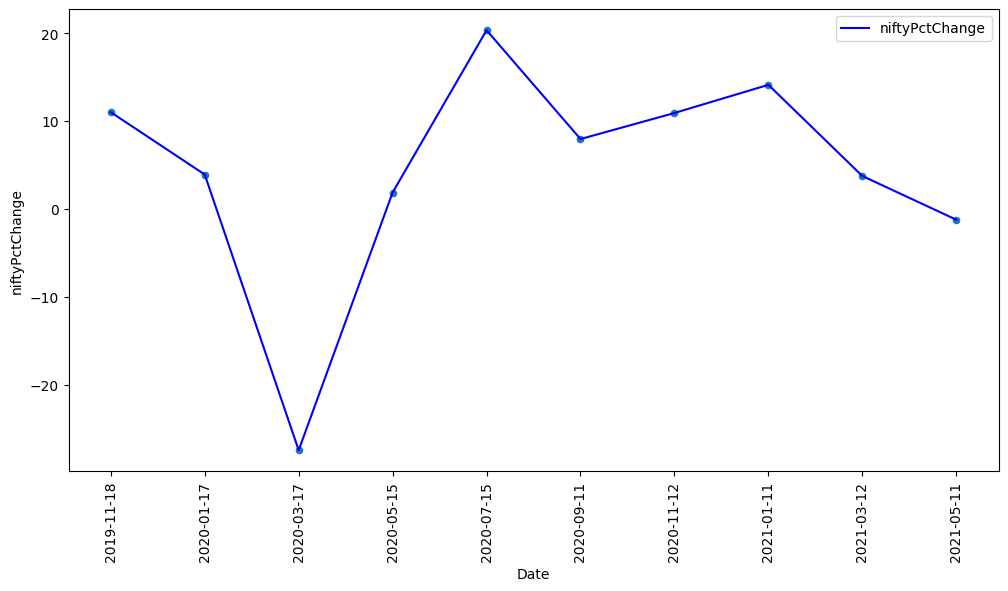

In [292]:
# plt.plot(data=portfolio)
nax = nifty_portfolio.plot(x="Date", y="niftyPctChange", kind="scatter",
                    figsize=[12, 6], style='b', rot=90)
nifty_portfolio.plot(x="Date", y="niftyPctChange", kind="line",
                     ax=nax, style='b', rot=90)

In [293]:
dats = pd.concat([portfolio, nifty_portfolio["niftyPctChange"]], axis=1)

In [294]:
dats

,Date,PctChange,niftyPctChange
0,2019-11-19,-8.932211,11.020292
1,2020-01-17,9.699034,3.936637
2,2020-03-18,-20.743098,-27.406120
3,2020-05-15,27.388618,1.893597
4,2020-07-16,18.801327,20.343413
5,2020-09-14,5.748997,7.969806
6,2020-11-13,7.474165,10.933082
7,2021-01-12,14.564393,14.135832
8,2021-03-12,-1.144709,3.770864
9,2021-05-12,11.473861,-1.198861


<Axes: xlabel='Date'>

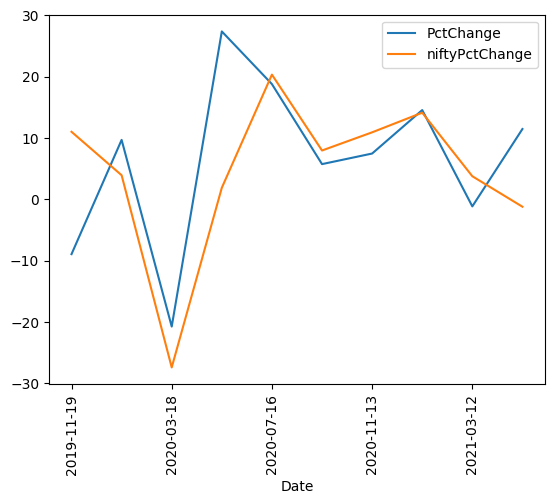

In [295]:
x = dats.plot(x="Date", y="PctChange", kind="line", rot=90)
dats.plot(x="Date", y="niftyPctChange",kind="line", ax=x, rot=90)

In [296]:
# calculate the final returns of the portfolio and the nifty starting from start_date and ending after duration days
end_invest = datetime.datetime.strptime(start_date, "%Y-%m-%d") + datetime.timedelta(days=backtest_duration)
total_portfolio_return = []
for key, value in invested.items():
    invested_start = timed_df[key][start_date] * invested[key]["units"]
    invested_end = timed_df[key][end_invest] * invested[key]["units"]
    total_portfolio_return.append((invested_end - invested_start) / invested_start * 100)

nifty_start = nifty["nifty"][start_date]
nifty_end = nifty["nifty"][end_invest]
nifty_return = (nifty_end - nifty_start) / nifty_start * 100

In [297]:
sum(total_portfolio_return) / len(total_portfolio_return) , nifty_return

(104.26602767397989, 38.72982466703431)

In [298]:
print("Portfolio Return: ", sum(total_portfolio_return) / len(total_portfolio_return))
print("Nifty Return: ", nifty_return)

Portfolio Return:  104.26602767397989
Nifty Return:  38.72982466703431
